# Code construction etc

## Load packages and scripts

In [49]:
# activate packages set environment 
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.activate(".")

  Activating project at `c:\Users\Lukas\Desktop\TopologicalDataAnalysis\ShapeDetectionGit\Detecting-Shapes`
  0 dependencies successfully precompiled in 8 seconds. 248 already precompiled.
  1 dependency errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`
  Activating project at `c:\Users\Lukas\Desktop\TopologicalDataAnalysis\ShapeDetectionGit\Detecting-Shapes`


In [50]:
# include src files 
include("src/filtration.jl")
import .Filtration
include("src/preprocessing.jl")
import .Preprocessing
include("src/visualization.jl")
import .Visualization
include("src/persistence.jl")
import .Persistence

## Load data

In [118]:
shapes = ["circle", "line_segment", "disk", "ellipsoid"]
path_changes = Dict("line_segment" => "line")
n_pershape = [1,2,3,4,5] 
n_datapoints = 30

pointclouds = []
corr_results = []
for s in shapes 
    for i in n_pershape
        push!(corr_results, s)
        # load the data 
        if s in keys(path_changes) 
            println("create path IF")
            path = "data\\"*s* "\\samples\\"*path_changes[s]*"_"*lpad(i,4,'0')*".csv"
        else 
            println("create path ELSE")
            path = "data\\"*s* "\\samples\\"*s*"_"*lpad(i,4,'0')*".csv"
        end 
        println(path)
        df = Preprocessing.load_pointcloud_csv(path)
        df = df[1:n_datapoints,:]
        points = [tuple(df[i, :]...) for i in axes(df, 1)]
        push!(pointclouds, points)
    end 
end 
        

create path ELSE
data\circle\samples\circle_0001.csv
create path ELSE
data\circle\samples\circle_0002.csv
create path ELSE
data\circle\samples\circle_0003.csv
create path ELSE
data\circle\samples\circle_0004.csv
create path ELSE
data\circle\samples\circle_0005.csv
create path IF
data\line_segment\samples\line_0001.csv
create path IF
data\line_segment\samples\line_0002.csv
create path IF
data\line_segment\samples\line_0003.csv
create path IF
data\line_segment\samples\line_0004.csv
create path IF
data\line_segment\samples\line_0005.csv
create path ELSE
data\disk\samples\disk_0001.csv
create path ELSE
data\disk\samples\disk_0002.csv
create path ELSE
data\disk\samples\disk_0003.csv
create path ELSE
data\disk\samples\disk_0004.csv
create path ELSE
data\disk\samples\disk_0005.csv
create path ELSE
data\ellipsoid\samples\ellipsoid_0001.csv
create path ELSE
data\ellipsoid\samples\ellipsoid_0002.csv
create path ELSE
data\ellipsoid\samples\ellipsoid_0003.csv
create path ELSE
data\ellipsoid\sample

## Compute Distance Matrix 

In [119]:
Ds = Persistence.create_wasserstein_matrix(pointclouds, "Rips", true)

Create Wasserstein Matrix with the filtration_type Rips
n_pointclouds = 20
dim = 3
Compute homology of the pointcloud 1
start to compute the filtration
filtration computed
result computed
start to compute the distances
distances computed
Compute homology of the pointcloud 2
start to compute the filtration
filtration computed
result computed
start to compute the distances
distances computed
Compute homology of the pointcloud 3
start to compute the filtration
filtration computed
result computed
start to compute the distances
distances computed
Compute homology of the pointcloud 4
start to compute the filtration
filtration computed
result computed
start to compute the distances
distances computed
Compute homology of the pointcloud 5
start to compute the filtration
filtration computed
result computed
start to compute the distances
distances computed
Compute homology of the pointcloud 6
start to compute the filtration
filtration computed
result computed
start to compute the distances
distan

2-element Vector{Matrix{Float64}}:
 [0.0 2.5 … 1.5 2.0; 2.5 0.0 … 1.0 0.5; … ; 1.5 1.0 … 0.0 0.5; 2.0 0.5 … 0.5 0.0]
 [0.0 1.0 … 1.0 1.5; 1.0 0.0 … 1.0 1.5; … ; 1.0 1.0 … 0.0 0.5; 1.5 1.5 … 0.5 0.0]

## Perform clustering in all dimensions 

In [85]:
using Clustering
using StatsPlots

In [111]:
dim = length(pointclouds[1][1])
results_clustering = []
for D in Ds 
    rc = hclust(D)
    push!(results_clustering, rc)
end 


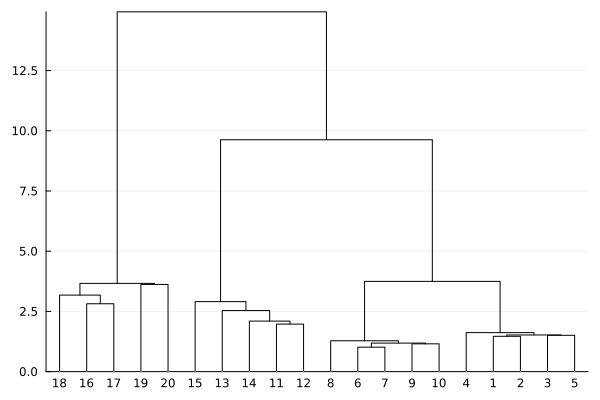

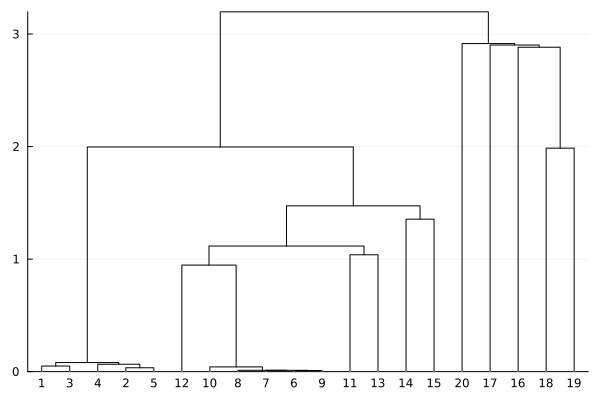

In [113]:
clusters = []
for r in results_clustering 
    display(plot(r))
    push!(clusters, cutree(r; k = length(shapes)))
end 

In [117]:
for hi in 1:length(clusters)
    println("")
    println("Results for H_", hi)
    for shape_idx in 1:length(shapes)
        println("CLuster 1 ---------")
        println(corr_results[clusters[hi] .== shape_idx])
    end 
end 



Results for H_1
CLuster 1 ---------
Any["circle", "circle", "circle", "circle", "circle"]
CLuster 1 ---------
Any["line_segment", "line_segment", "line_segment", "line_segment", "line_segment"]
CLuster 1 ---------
Any["disk", "disk", "disk", "disk", "disk"]
CLuster 1 ---------
Any["ellipsoid", "ellipsoid", "ellipsoid", "ellipsoid", "ellipsoid"]

Results for H_2
CLuster 1 ---------
Any["circle", "circle", "circle", "circle", "circle", "line_segment", "line_segment", "line_segment", "line_segment", "line_segment", "disk", "disk", "disk", "disk", "disk"]
CLuster 1 ---------
Any["ellipsoid", "ellipsoid", "ellipsoid"]
CLuster 1 ---------
Any["ellipsoid"]
CLuster 1 ---------
Any["ellipsoid"]
